In [29]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

# Dataset - CIFAR-10 - 60000 images, 32 x 32 size, 10 classes  50000 training  10000 testing   -> 5 batchs each batch contains 10000 images

In [42]:
print(dir(models))

['Model', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'clone_model', 'load_model', 'model_from_json', 'save_model']


In [3]:
type(datasets.cifar10.load_data())

tuple

In [20]:


classes = ['airplane' ,'automobile' ,'bird','cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

array([4], dtype=uint8)

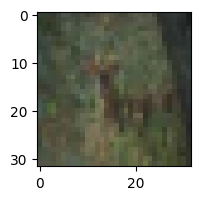

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[10])
y_train[10]

In [11]:
type(y_train.shape)

tuple

In [12]:
y_train.ndim

2

In [13]:
y_train = y_train.reshape(-1,)

In [14]:
y_train.ndim

1

In [15]:
y_train[10]

4

In [21]:
def showimgandclass(X,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

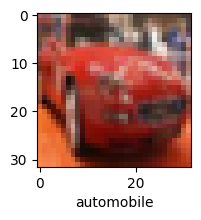

In [23]:
showimgandclass(X_train,y_train,5
               )

In [34]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
X_train = X_train/255
X_test = X_test/255

In [37]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [54]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(keras.Input(shape=(32,32,3)))  # Input: 32x32 RGB image
model.add(layers.Flatten())  # Flatten into 3072

# Hidden layers with ReLU activation
model.add(layers.Dense(3000, activation='relu'))  
model.add(layers.Dense(1000, activation='relu'))

# Output layer with softmax for multi-class classification (e.g., CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))


In [55]:
model

<Sequential name=sequential_7, built=True>

In [58]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4147 - loss: 1.6511
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4532 - loss: 1.5531
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4720 - loss: 1.4926
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.4953 - loss: 1.4389
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.5095 - loss: 1.3924


In [69]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(layers.MaxPool2D((2,2))),
cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu')),
cnn.add(layers.MaxPool2D((2,2)))
cnn.add(layers.Flatten())  # Flatten into 3072

# Hidden layers with ReLU activation
cnn.add(layers.Dense(32, activation='relu'))  
cnn.add(layers.Dense(64, activation='relu'))

# Output layer with softmax for multi-class classification (e.g., CIFAR-10)
cnn.add(layers.Dense(10, activation='softmax'))


In [72]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5830 - loss: 1.1729
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6487 - loss: 1.0059
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6822 - loss: 0.9037
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.7090 - loss: 0.8347
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7257 - loss: 0.7837


In [75]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [86]:
y_test[0]

array([3], dtype=uint8)

In [76]:
import numpy as np

In [84]:
classes[np.argmax(y_pred[0])]

'cat'

C:\Users\Admin\AppData\Local\Temp\ipykernel_6948\4013424151.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y_test[0])])


Text(0.5, 0, 'cat')

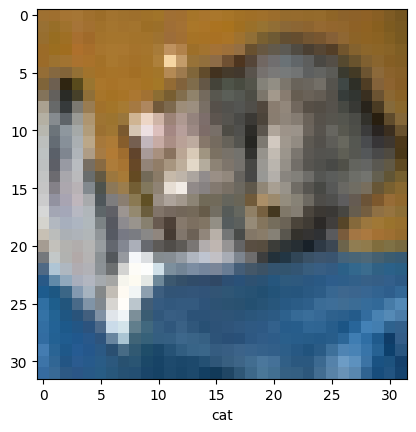

In [87]:
plt.imshow(X_test[0])
plt.xlabel(classes[int(y_test[0])])